# ANÁLISIS PARTE I

In [5]:
# 1. Importamos las librerías necesarias
import pandas as pd               # Para manipular tablas de datos
import matplotlib.pyplot as plt   # Para crear gráficos básicos
import seaborn as sns             # Para hacer los gráficos más bonitos

# 2. Configuración estética (para que los gráficos se vean bien)
sns.set_style("whitegrid")        # Pone una cuadrícula suave de fondo
plt.rcParams['figure.figsize'] = (12, 6) # Define el tamaño por defecto de los gráficos
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Para no ver notación científica (1.2e+06)

print("✅ Mesa de trabajo lista.")

✅ Mesa de trabajo lista.


In [6]:
# Cargamos los CSVs limpios
# Ajusta la ruta '../data/processed/' si tus archivos están en otro lado
df_trafico = pd.read_csv('../data/processed/CO280_trafico_total_ccaa_tipo_desplaz_y_mercancia_clean.csv')
df_flujos  = pd.read_csv('../data/processed/CO282_flujos_ccaa_origen_destino_clean.csv')

print("Datos cargados:")
print(f"- Tráfico Total (Filas, Columnas): {df_trafico.shape}")
print(f"- Flujos O-D    (Filas, Columnas): {df_flujos.shape}")

Datos cargados:
- Tráfico Total (Filas, Columnas): (6353, 7)
- Flujos O-D    (Filas, Columnas): (1800, 5)


## Análisis de tendencia temporal
### ¿El transporte en España está creciendo o decreciendo?

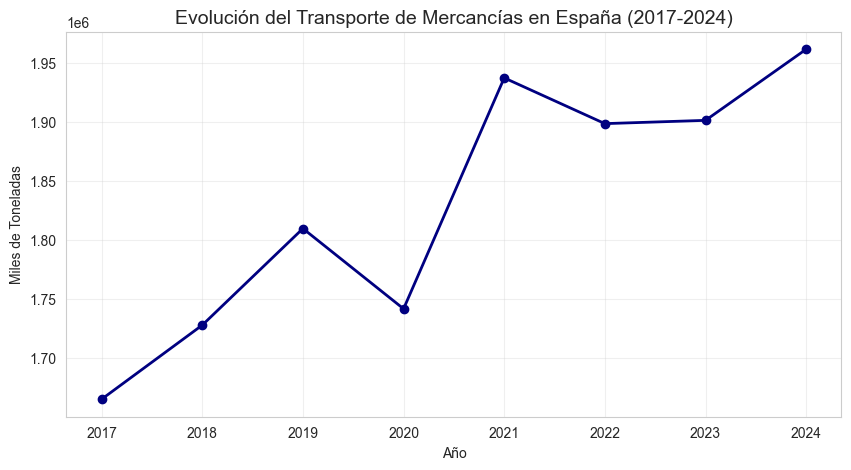

Año
2017   1665234.51
2018   1727927.95
2019   1809631.48
2020   1741722.38
2021   1937052.04
2022   1898370.92
2023   1901137.68
2024   1961313.40
Name: Toneladas(miles), dtype: float64


In [7]:
# 1. Agrupamos por Año y sumamos las Toneladas
evolucion_anual = df_trafico.groupby('Año')['Toneladas(miles)'].sum()

# 2. Visualizamos
plt.figure(figsize=(10, 5))
# Pintamos un gráfico de línea con marcadores (puntos)
evolucion_anual.plot(kind='line', marker='o', color='navy', linewidth=2)

plt.title('Evolución del Transporte de Mercancías en España (2017-2024)', fontsize=14)
plt.ylabel('Miles de Toneladas')
plt.xlabel('Año')
plt.grid(True, alpha=0.3) # Rejilla suave

# Mostramos el gráfico
plt.show()

# 3. Vemos los datos numéricos
print(evolucion_anual)

## ¿qué tipo de mercancía es la más importante?

C:\Users\esanc\AppData\Local\Temp\ipykernel_23636\1846420816.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mix_mercancia.values, y=mix_mercancia.index, legend=False, palette='crest')


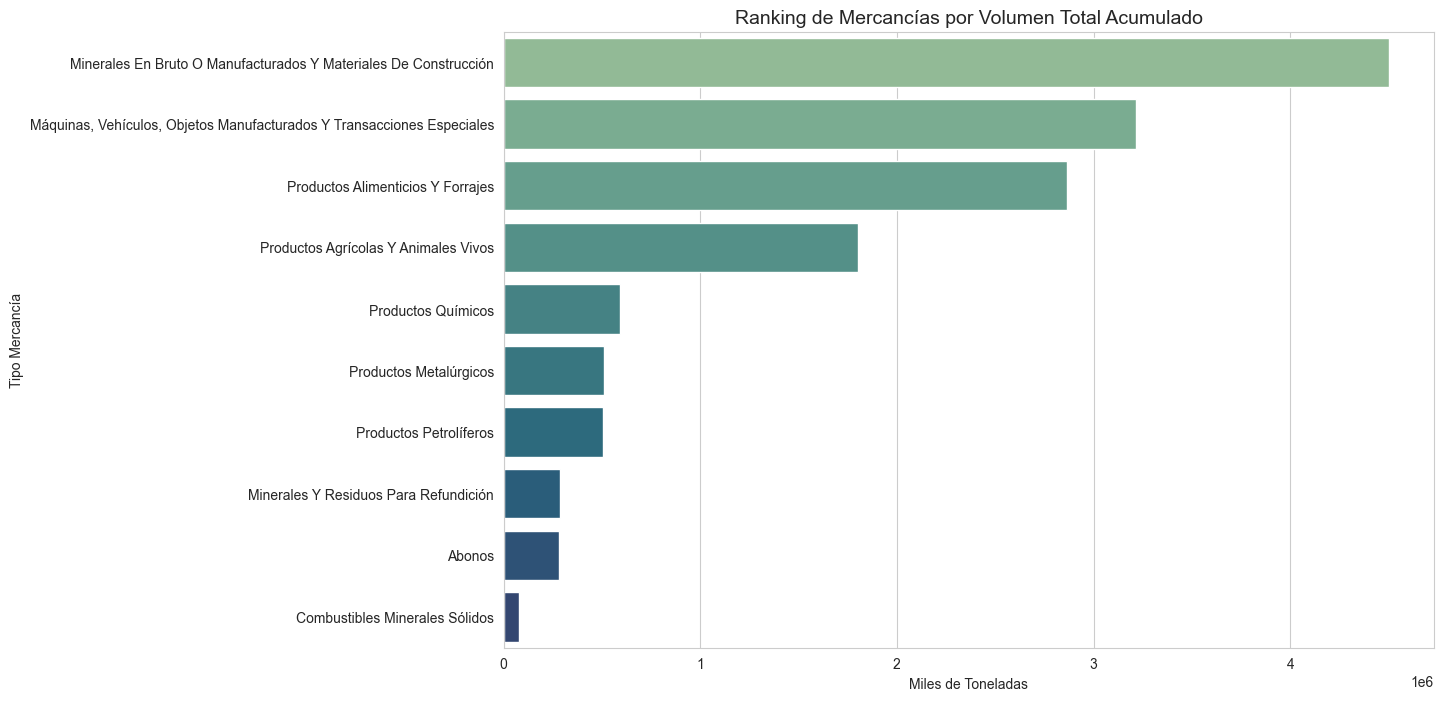

In [27]:
# 1. Agrupamos por Tipo de Mercancía y sumamos
mix_mercancia = df_trafico.groupby('Tipo Mercancía')['Toneladas(miles)'].sum()

# 2. Ordenamos de mayor a menor (importante para ver el ranking)
mix_mercancia = mix_mercancia.sort_values(ascending=False)

# 3. Gráfico de Barras Horizontales
plt.figure(figsize=(12, 8))
sns.barplot(x=mix_mercancia.values, y=mix_mercancia.index, legend=False, palette='crest')

plt.title('Ranking de Mercancías por Volumen Total Acumulado', fontsize=14)
plt.xlabel('Miles de Toneladas')
plt.show()

## La Matriz Origen-Destino (El Mapa de Calor)
### ¿Cuáles son las principales "autopistas" logísticas de España?

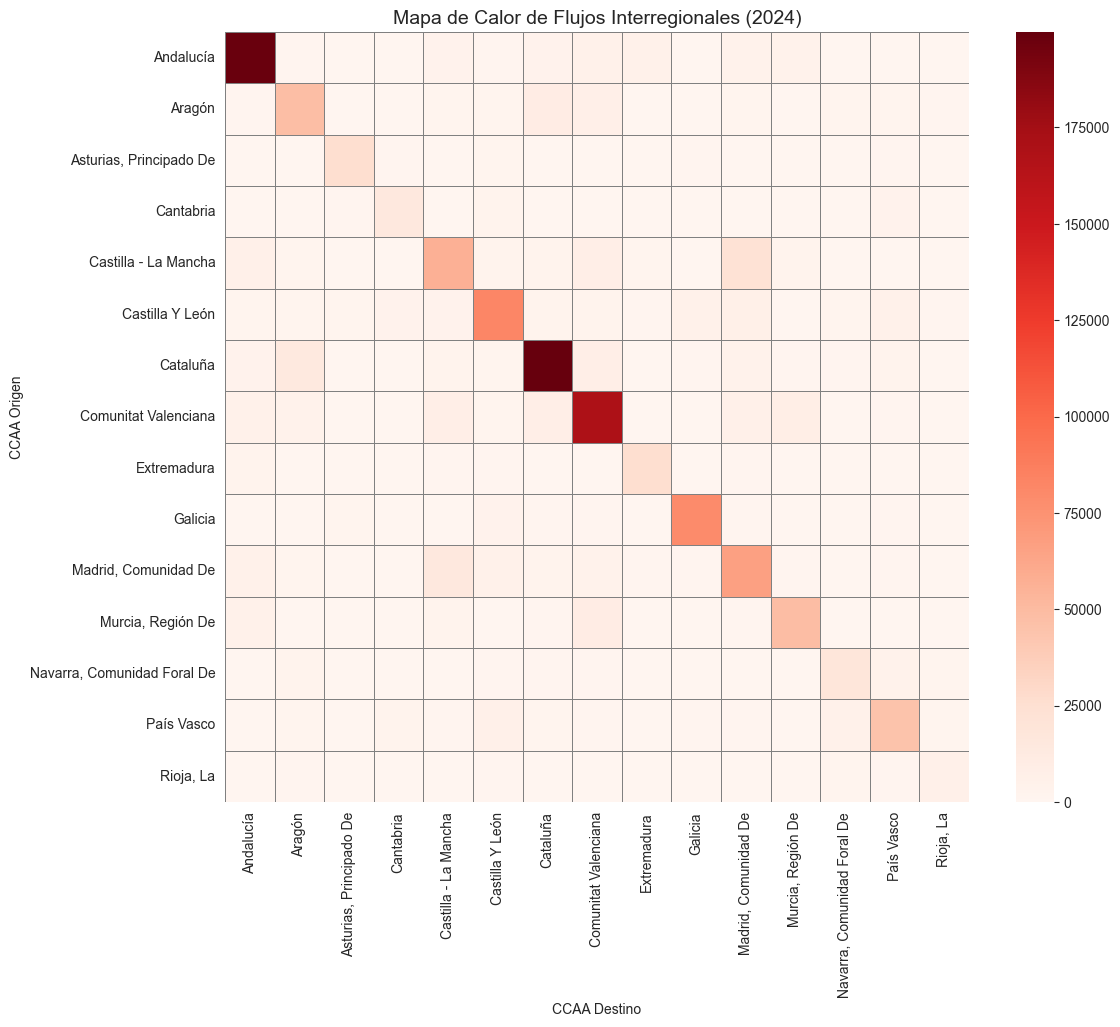

In [28]:
# Vamos a filtrar solo el último año disponible (ej. 2022, 2023 o 2024) para ver la foto actual
anio_reciente = df_flujos['Año'].max()
df_2024 = df_flujos[df_flujos['Año'] == anio_reciente]

# Creamos la matriz:
# Índices (Filas) = Origen
# Columnas = Destino
# Valores = Toneladas
matriz_od = df_2024.pivot_table(index='CCAA Origen', 
                                columns='CCAA Destino', 
                                values='Toneladas(miles)', 
                                aggfunc='sum')

# Dibujamos el Mapa de Calor (Heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_od, cmap='Reds', linewidths=.5, linecolor='gray')

plt.title(f'Mapa de Calor de Flujos Interregionales ({anio_reciente})', fontsize=14)
plt.show()

In [35]:
# Calculamos el total movido por cada CCAA (como origen)
ranking_ccaa = df_trafico.groupby('CCAA')['Toneladas(miles)'].sum().reset_index()

# Calculamos el % que representa sobre el total
total_espana = ranking_ccaa['Toneladas(miles)'].sum()
ranking_ccaa['Cuota_Mercado_%'] = (ranking_ccaa['Toneladas(miles)'] / total_espana) * 100

# Ordenamos
ranking_ccaa = ranking_ccaa.sort_values('Cuota_Mercado_%', ascending=False)

# Mostramos los top 5 "Hubs" de España
print(ranking_ccaa.head(5))

                    CCAA  Toneladas(miles)  Cuota_Mercado_%
6               Cataluña        2236754.23            15.28
7   Comunitat Valenciana        2065530.92            14.11
0              Andalucía        2065352.31            14.11
10  Madrid, Comunidad de        1226661.73             8.38
5        Castilla y León        1186999.29             8.11


In [36]:
ranking_ccaa.to_csv('../data/processed/KPI_Cuota_Mercado_CCAA.csv', index=False)
print("✅ Archivo KPI guardado.")

✅ Archivo KPI guardado.
